<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#概要" data-toc-modified-id="概要-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>概要</a></span><ul class="toc-item"><li><span><a href="#教材サイト/エントリ" data-toc-modified-id="教材サイト/エントリ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>教材サイト/エントリ</a></span><ul class="toc-item"><li><span><a href="#教材データ" data-toc-modified-id="教材データ-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>教材データ</a></span></li></ul></li><li><span><a href="#解析処理の追試" data-toc-modified-id="解析処理の追試-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>解析処理の追試</a></span><ul class="toc-item"><li><span><a href="#データの取得" data-toc-modified-id="データの取得-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>データの取得</a></span></li></ul></li><li><span><a href="#基礎的統計解析" data-toc-modified-id="基礎的統計解析-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>基礎的統計解析</a></span></li><li><span><a href="#バイオリンプロットするがちょっと汚い" data-toc-modified-id="バイオリンプロットするがちょっと汚い-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>バイオリンプロットするがちょっと汚い</a></span></li><li><span><a href="#ペアプロットを見てみる" data-toc-modified-id="ペアプロットを見てみる-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>ペアプロットを見てみる</a></span></li><li><span><a href="#サブプロットを駆使してヒストグラムを並べてみる" data-toc-modified-id="サブプロットを駆使してヒストグラムを並べてみる-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>サブプロットを駆使してヒストグラムを並べてみる</a></span></li><li><span><a href="#相関係数のヒートマップ描画" data-toc-modified-id="相関係数のヒートマップ描画-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>相関係数のヒートマップ描画</a></span></li><li><span><a href="#偏相関係数の計算：見せ掛けの相関を見抜く" data-toc-modified-id="偏相関係数の計算：見せ掛けの相関を見抜く-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>偏相関係数の計算：見せ掛けの相関を見抜く</a></span><ul class="toc-item"><li><span><a href="#偏相関の概念を理解する" data-toc-modified-id="偏相関の概念を理解する-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>偏相関の概念を理解する</a></span></li><li><span><a href="#偏相関係数を求める関数を実装する" data-toc-modified-id="偏相関係数を求める関数を実装する-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>偏相関係数を求める関数を実装する</a></span></li><li><span><a href="#見せ掛けの相関かどうか判定するには" data-toc-modified-id="見せ掛けの相関かどうか判定するには-1.8.3"><span class="toc-item-num">1.8.3&nbsp;&nbsp;</span>見せ掛けの相関かどうか判定するには</a></span></li><li><span><a href="#見せ掛けの相関を探す" data-toc-modified-id="見せ掛けの相関を探す-1.8.4"><span class="toc-item-num">1.8.4&nbsp;&nbsp;</span>見せ掛けの相関を探す</a></span></li></ul></li></ul></li></ul></div>

# 概要
教材となるサイトを見て、その内容を追試(Test-Retest)し、データサイエンスの基礎的な流れをおさらいする。  

## 教材サイト/エントリ

「正答率100%」になってしまう機械学習モデルの例を挙げてみる
https://tjo.hatenablog.com/entry/2016/01/27/235620

同じデータセットに対するアプローチの違いから見る「データ分析のステージ」
https://tjo.hatenablog.com/entry/2015/02/20/190000

上記サイトではRで実装されているが、Pythonで実装する。

### 教材データ

https://github.com/ozt-ca/tjo.hatenablog.samples/blob/master/r_samples/public_lib/jp/exp_uci_datasets/tennis/men.txt  
https://github.com/ozt-ca/tjo.hatenablog.samples/blob/master/r_samples/public_lib/jp/exp_uci_datasets/tennis/women.txt

In [1]:
import os
import sys
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## 解析処理の追試

### データの取得
以下にあるデータを取ってくる。
> https://github.com/ozt-ca/tjo.hatenablog.samples/raw/master/r_samples/public_lib/jp/exp_uci_datasets/tennis/men.txt  
> https://github.com/ozt-ca/tjo.hatenablog.samples/raw/master/r_samples/public_lib/jp/exp_uci_datasets/tennis/women.txt

取得方法であるが、pandas.read_csvは、データソースにローカルのファイルだけでなく、URLを指定することができる。  
今回は、データソースがURLで指定されているため、read_csv()の引数にURLを指定する。便利である。

In [2]:
# pd.read_csv() は、URLに対応しているので、指定することができる。
# import requests

src_url = {'men': 'https://github.com/ozt-ca/tjo.hatenablog.samples/raw/master/r_samples/public_lib/jp/exp_uci_datasets/tennis/men.txt',
           'women': 'https://github.com/ozt-ca/tjo.hatenablog.samples/raw/master/r_samples/public_lib/jp/exp_uci_datasets/tennis/women.txt'
          }

df_train = {}
for _type, _url in src_url.items():
    #_text = requests.get(_url).text
    df_train[_type] = pd.read_csv(_url, delimiter='\t')
    display(df_train[_type])


,Player1,Player2,Result,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Lukas Lacko,Novak Djokovic,0,61,35,39,18,5,1,17,...,4,8,8,9,101,6,7,6,0,0
1,Leo0rdo Mayer,Albert Montanes,1,61,31,39,13,13,1,13,...,0,0,0,0,42,1,3,1,0,0
2,Marcos Baghdatis,Denis Istomin,0,52,53,48,20,8,4,37,...,4,13,12,16,126,6,7,6,0,0
3,Dmitry Tursunov,Michael Russell,1,53,39,47,24,8,6,8,...,1,7,0,0,79,2,2,3,0,0
4,Juan Mo0co,Ernests Gulbis,0,76,63,24,12,0,4,16,...,3,5,16,28,127,1,6,7,6,0
5,Santiago Giraldo,Sam Querrey,0,65,51,35,22,9,3,35,...,4,7,14,17,122,6,6,3,7,0
6,Dudi Sela,Jarkko Nieminen,0,68,73,32,24,5,3,41,...,10,17,25,36,173,3,7,6,6,6
7,Fabio Fognini,Alex Bogomolov Jr.,1,47,18,53,15,3,4,21,...,2,6,8,12,61,3,2,0,0,0
8,David Guez,Richard Gasquet,0,64,26,36,12,3,0,20,...,7,10,8,11,94,7,6,6,0,0
9,Nikolay Davydenko,Lukasz Kubot,1,77,76,23,11,6,4,6,...,6,14,0,0,141,6,3,6,3,4


,Player1,Player2,Result,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,...,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,Serena Williams,Ashleigh Barty,1,59,20,41,8,6,2,31,...,0,0,2,4,31,2,1,0,0,0
1,Vesna Dolonc,Lara Arruabarrena,1,65,33,35,10,7,4,7,...,4,7,0,0,74,6,2,4,0,0
2,Pauline Parmentier,Karolina Pliskova,0,63,16,37,4,3,6,3,...,5,14,0,0,64,6,6,0,0,0
3,Heather Watson,Daniela Hantuchova,0,61,41,39,19,8,3,27,...,5,13,5,8,102,7,3,6,0,0
4,Samantha Stosur,Klara Zakopalova,1,65,28,35,11,6,1,19,...,4,14,10,15,60,3,4,0,0,0
5,Tsvetana Pironkova,Silvia Soler-Espinosa,1,62,28,38,12,5,0,30,...,0,3,6,6,44,3,2,0,0,0
6,Annika Beck,Petra Martic,1,67,18,33,8,0,0,8,...,0,2,3,7,25,0,0,0,0,0
7,Kiki Bertens,Ana Ivanovic,0,61,15,39,11,2,4,23,...,8,9,4,6,73,6,6,0,0,0
8,Roberta Vinci,Jie Zheng,0,66,23,34,7,3,3,20,...,5,7,1,2,67,6,6,0,0,0
9,Patricia Mayr-Achleitner,Madison Keys,0,71,48,29,14,0,1,0,...,8,10,0,0,135,6,6,9,0,0


## 基礎的統計解析
各特徴量ごとの統計量を求める。

In [3]:
df_train_stat = {}

# men/women で分けて求める
stat_cols = ['feature', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
for _type, _df in df_train.items():
    df_train_stat[_type] = pd.DataFrame()
    buffer_stats = []
    for _col in _df.columns:
        buffer_stats.append([_col] + list(_df[_col].describe().values))
        # print([_col] + list(_df[_col].describe().values))
    df_train_stat[_type] = pd.DataFrame(data=buffer_stats, columns=stat_cols)
    display(df_train_stat[_type])

,feature,count,mean,std,min,25%,50%,75%,max
0,Player1,491.0,225.000000,Rafael 0dal,13.0,NaN,NaN,NaN,NaN
1,Player2,491.0,216.000000,David Ferrer,16.0,NaN,NaN,NaN,NaN
2,Result,491.0,0.488798,0.500384,0.0,0.0,0.0,1.0,1.0
3,FSP.1,491.0,61.896130,7.5322,38.0,57.0,62.0,67.0,85.0
4,FSW.1,491.0,49.242363,16.1891,10.0,38.0,48.0,58.0,109.0
5,SSP.1,491.0,38.103870,7.5322,15.0,33.0,38.0,43.0,62.0
6,SSW.1,491.0,21.417515,8.46257,3.0,15.0,21.0,27.0,52.0
7,ACE.1,491.0,9.034623,6.50156,0.0,4.0,7.0,13.0,41.0
8,DBF.1,491.0,3.926680,2.85119,0.0,2.0,3.0,6.0,18.0
9,WNR.1,491.0,27.305499,22.0925,0.0,0.0,28.0,42.0,111.0


,feature,count,mean,std,min,25%,50%,75%,max
0,Player1,452.0,253.000000,Serena Williams,11.0,NaN,NaN,NaN,NaN
1,Player2,452.0,256.000000,Maria Sharapova,11.0,NaN,NaN,NaN,NaN
2,Result,452.0,0.497788,0.500549,0.0,0.00,0.0,1.00,1.0
3,FSP.1,452.0,62.648230,8.31544,40.0,57.00,63.0,68.00,86.0
4,FSW.1,452.0,27.426991,10.2761,3.0,21.00,27.0,34.00,57.0
5,SSP.1,452.0,37.440265,8.31121,14.0,32.00,37.0,43.00,60.0
6,SSW.1,452.0,11.637168,5.19946,1.0,8.00,11.0,15.00,28.0
7,ACE.1,452.0,2.696903,2.63335,0.0,1.00,2.0,4.00,14.0
8,DBF.1,452.0,3.267699,2.38835,0.0,1.00,3.0,5.00,13.0
9,WNR.1,452.0,20.110619,10.0467,0.0,13.00,20.0,26.00,60.0


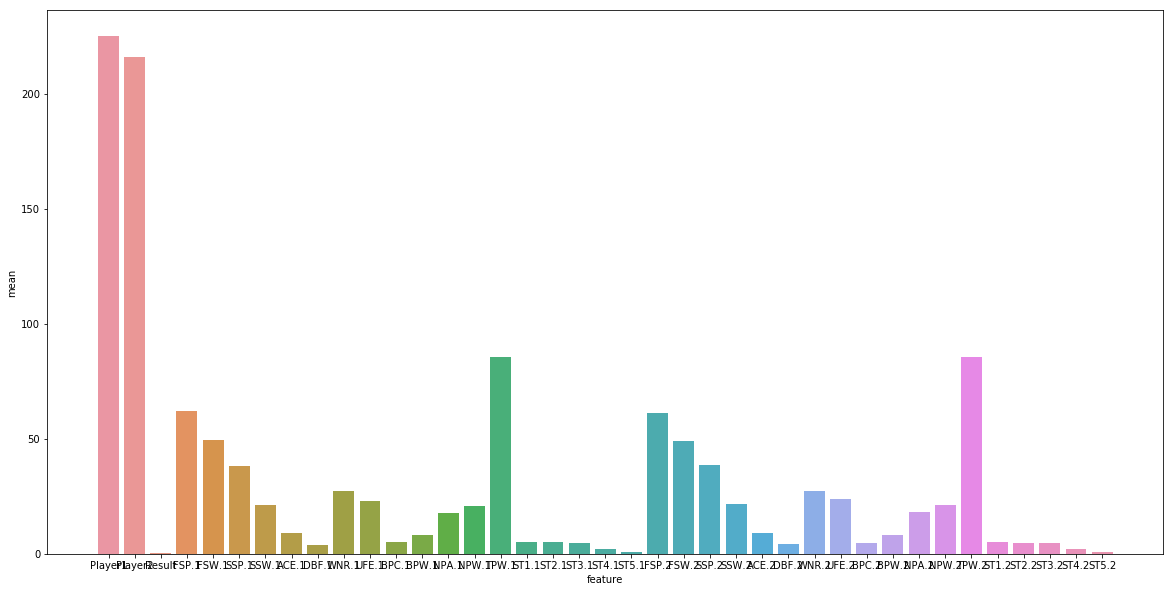

In [36]:
# https://pythondatascience.plavox.info/seaborn/%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x="feature", y="mean", data=df_train_stat['men'])
ax.plot(x=["FSP.1","FSP.1"], y=[61 - 2.0 * 7.5,
                               61 + 2.0 * 7.5
                               ], c="black")
plt.show()

## バイオリンプロットするがちょっと汚い

もともとカテゴリ型の変数を対象とした描画処理である。  
このデータセットには向いていないか。


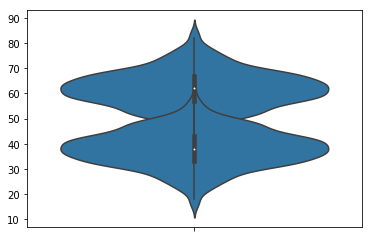

In [33]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
ax = sns.violinplot(x=None, y=["FSP.1"], data=df_train['men'])
ax = sns.violinplot(x=None, y=["SSP.1"], ax=ax, data=df_train['men'])


## ペアプロットを見てみる

特徴量間の相関および、各特徴量の分布を見るときはペアプロットであろう。  
と思ったが、特徴量組み合わせが多いので、かなり計算時間がかかる上に、何より見づらい。
これは考えものである。

In [18]:
plot_features = ['FSP.1',
 'FSW.1',
 'SSP.1',
 'SSW.1',
 'ACE.1',
 'DBF.1',
 'WNR.1',
 'UFE.1',
 'BPC.1',
 'BPW.1',
 'NPA.1',
 'NPW.1',
 'TPW.1',
 'ST1.1',
 'ST2.1',
 'ST3.1',
 'ST4.1',
 'ST5.1',
 'FSP.2',
 'FSW.2',
 'SSP.2',
 'SSW.2',
 'ACE.2',
 'DBF.2',
 'WNR.2',
 'UFE.2',
 'BPC.2',
 'BPW.2',
 'NPA.2',
 'NPW.2',
 'TPW.2',
 'ST1.2',
 'ST2.2',
 'ST3.2',
 'ST4.2',
 'ST5.2']

#ax = sns.pairplot(df_train['men'], height=3, vars=plot_features)

## サブプロットを駆使してヒストグラムを並べてみる

参考:

* サブプロットの使い方の基本を確認できる。
  https://qiita.com/supersaiakujin/items/543053ca4610437112df

* サブプロット間の余白調節方法を確認できる。
  http://ailaby.com/subplots_adjust/

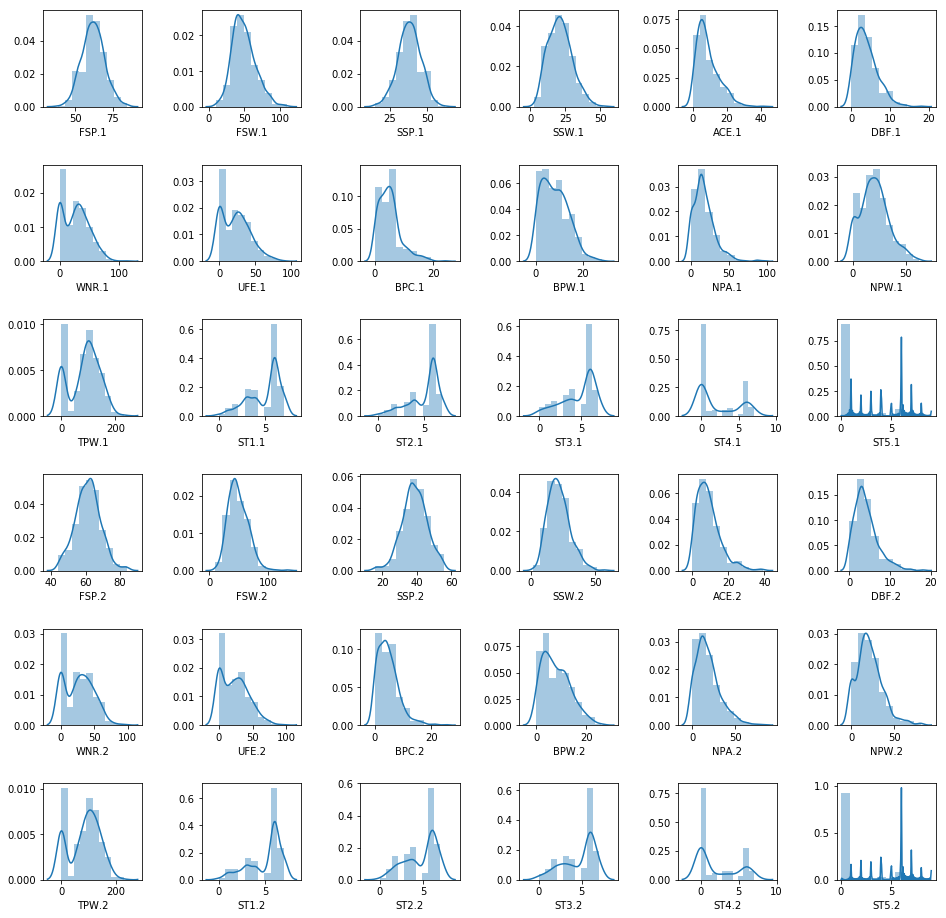

In [45]:
fig, axes = plt.subplots(ncols=6, nrows=6, figsize=(16,16))
plot_cursor = 0
for _row in range(6):
    for _col in range(6):
        _plot_feature = plot_features[plot_cursor]
        sns.distplot(df_train['men'][_plot_feature], 
                     kde=True, hist=True, 
                     vertical=False, bins=10, 
                     ax=axes[_row, _col],
                     label=_plot_feature) 
        plot_cursor += 1
plt.subplots_adjust(wspace=0.6, hspace=0.6)

## 相関係数のヒートマップ描画
数値カラムだけを選別して、相関係数を見てみよう。


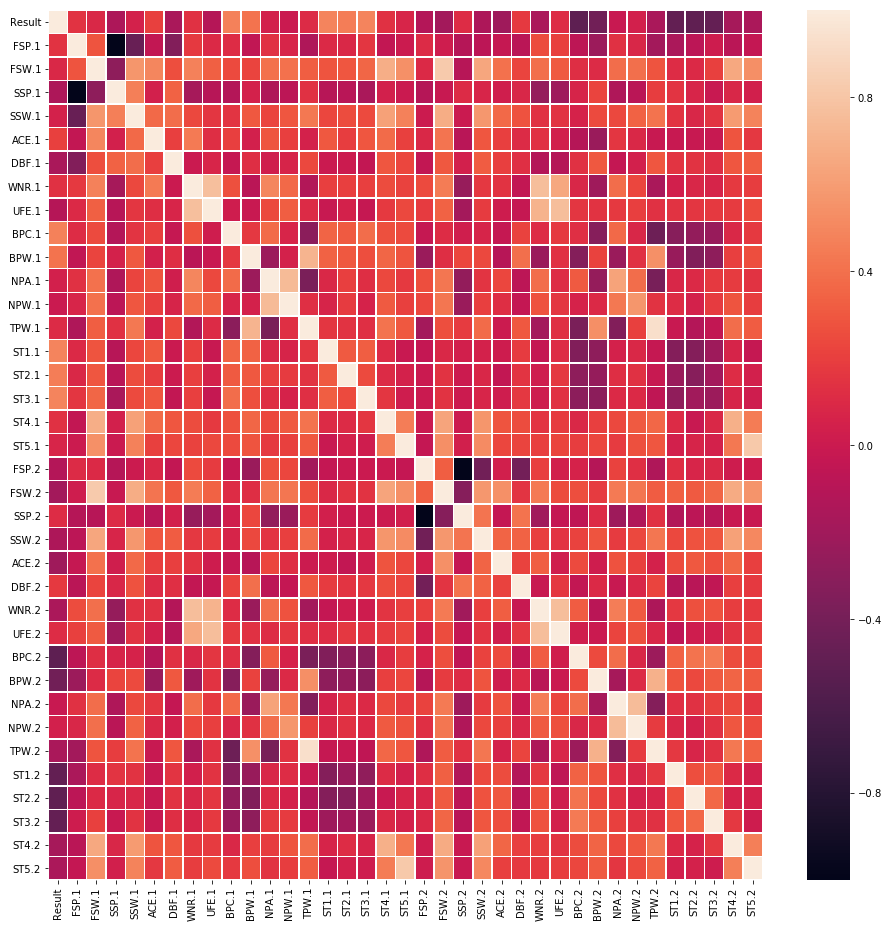

In [4]:
plot_features = ['Result', 'FSP.1',
 'FSW.1',
 'SSP.1',
 'SSW.1',
 'ACE.1',
 'DBF.1',
 'WNR.1',
 'UFE.1',
 'BPC.1',
 'BPW.1',
 'NPA.1',
 'NPW.1',
 'TPW.1',
 'ST1.1',
 'ST2.1',
 'ST3.1',
 'ST4.1',
 'ST5.1',
 'FSP.2',
 'FSW.2',
 'SSP.2',
 'SSW.2',
 'ACE.2',
 'DBF.2',
 'WNR.2',
 'UFE.2',
 'BPC.2',
 'BPW.2',
 'NPA.2',
 'NPW.2',
 'TPW.2',
 'ST1.2',
 'ST2.2',
 'ST3.2',
 'ST4.2',
 'ST5.2']

plt.figure(figsize=(16., 16))
df_corr = df_train['men'][plot_features].corr()
ax = sns.heatmap(df_corr, linewidths=.5)  
plt.show()

Result との間に、弱い正の相関、負の相関を持つ特徴量が存在するようだ。  
絶対値が0.40以上の相関係数を持つ特徴量は結構ある。  
これらの特徴量だけで、性能の高いモデルを構築できるだろう。

ただし、単変数間の相関であるため、まだ楽観するのは早いだろう。  
偏相関係数を求めて、見せ掛けの相関に陥っていないか調査した方が賢明であろう。  

In [65]:
corr_result = df_corr.loc['Result']
corr_result = corr_result[corr_result.abs() > 0.40]
display(corr_result)

Result    1.000000
BPC.1     0.471084
BPW.1     0.408428
ST1.1     0.490540
ST2.1     0.459325
ST3.1     0.488375
BPC.2    -0.508852
BPW.2    -0.419437
ST1.2    -0.485656
ST2.2    -0.501431
ST3.2    -0.481481
Name: Result, dtype: float64

## 偏相関係数の計算：見せ掛けの相関を見抜く

実装コードで参考にしたのはこちら。  
偏相関係数の求め方のコード例が手に入る。  
https://blog.amedama.jp/entry/2017/06/20/215816  
https://qiita.com/sumire4ever/items/e5c6030808880b859890

変数A,B,C の相関係数を $ r_{AB}, r_{BC}, r_{AC} $とすると、変数Cの影響を除いた偏相関係数は以下のようになる。  
 $ {r_{AB・C} = \frac{r_{AB}-r_{AC}r_{BC}}{\sqrt{1-{r_{AC}}^2}\sqrt{1-{r_{BC}}^2}}} $
 
目的変数 Result を予測したい場合、
Result-変数A , Result-変数B, 変数A-B 間の相関係数を求めて、上記の式に当てはめればよい。  

### 偏相関の概念を理解する

こちらのサイトにある解説図が非常に良い。
残差同士の相関が、偏相関であると説明がある。  
http://kogolab.chillout.jp/elearn/icecream/chap5/sec5.html

> 最高気温と最低気温の散布図＝回帰成分（相関1）＋残差（相関0）
***
> 今まで「最高気温の影響を取り除く」と言ってきたのは、この２つの回帰成分（相関1）を取り除くということに当たる。そうすると、残りは残差だけなの
もで、この残差同士の相関係数を求めて、偏相関係数としたわけだ。

こちらのエントリーも分かりやすい。  
数式による証明がある。  
https://mathtrain.jp/partialcor

In [8]:
df_corr.columns

Index(['Result', 'FSP.1', 'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1',
       'UFE.1', 'BPC.1', 'BPW.1', 'NPA.1', 'NPW.1', 'TPW.1', 'ST1.1', 'ST2.1',
       'ST3.1', 'ST4.1', 'ST5.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2',
       'DBF.2', 'WNR.2', 'UFE.2', 'BPC.2', 'BPW.2', 'NPA.2', 'NPW.2', 'TPW.2',
       'ST1.2', 'ST2.2', 'ST3.2', 'ST4.2', 'ST5.2'],
      dtype='object')

### 偏相関係数を求める関数を実装する
関数 partial_corr を実装し、偏相関係数を実験的に計算してみる。  
'Result' と'ST1.1' との間の、ACE.1 の影響を除いた偏相関係数を求めてみる。

In [6]:
def partial_corr(r_ab, r_bc, r_ac):
    return (r_ab - r_ac * r_bc)/(np.sqrt(1 - r_ac**2) * np.sqrt(1 - r_bc**2))


In [7]:
r_ab = df_corr.loc['Result', 'ST1.1']
r_bc = df_corr.loc['ST1.1', 'ACE.1']
r_ac = df_corr.loc['Result', 'ACE.1']
p_corr = partial_corr(r_ab, r_bc, r_ac)
print("Result-ST1.1 間の偏相関係数＠ACE.1")
print(p_corr)

Result-ST1.1 間の偏相関係数＠ACE.1
0.45861153968


### 見せ掛けの相関かどうか判定するには
相関判定をしたい二つの変数を選ぶ。  
そして、上記二つ以外の変数の影響を除いた偏相関係数を求めていく。

In [11]:
target_col = 'Result'
from_col = 'ST1.1'
print("{} - {} 間の相関係数: {}".format(from_col, target_col, df_corr.loc[from_col, target_col]))
print("*" * 80)
for _col in df_corr.columns:
    if _col not in (target_col, from_col):
        r_ab = df_corr.loc[target_col, from_col]
        r_bc = df_corr.loc[from_col, _col]
        r_ac = df_corr.loc[target_col, _col]
        p_corr = partial_corr(r_ab, r_bc, r_ac)
        print("{}-{} 間の偏相関係数＠{} : {}".format(from_col, target_col, _col, p_corr))

ST1.1 - Result 間の相関係数: 0.49053993856009964
********************************************************************************
ST1.1-Result 間の偏相関係数＠FSP.1 : 0.48382032569464295
ST1.1-Result 間の偏相関係数＠FSW.1 : 0.4877667364302057
ST1.1-Result 間の偏相関係数＠SSP.1 : 0.48382032569464295
ST1.1-Result 間の偏相関係数＠SSW.1 : 0.49297383325220484
ST1.1-Result 間の偏相関係数＠ACE.1 : 0.45861153967959845
ST1.1-Result 間の偏相関係数＠DBF.1 : 0.49626835433180544
ST1.1-Result 間の偏相関係数＠WNR.1 : 0.47738228876693234
ST1.1-Result 間の偏相関係数＠UFE.1 : 0.49116146813553346
ST1.1-Result 間の偏相関係数＠BPC.1 : 0.39637597445600575
ST1.1-Result 間の偏相関係数＠BPW.1 : 0.40915934775860163
ST1.1-Result 間の偏相関係数＠NPA.1 : 0.48925704972137835
ST1.1-Result 間の偏相関係数＠NPW.1 : 0.4919275721163487
ST1.1-Result 間の偏相関係数＠TPW.1 : 0.48259036796570715
ST1.1-Result 間の偏相関係数＠ST2.1 : 0.413914770457224
ST1.1-Result 間の偏相関係数＠ST3.1 : 0.4031422051427254
ST1.1-Result 間の偏相関係数＠ST4.1 : 0.48358279255325765
ST1.1-Result 間の偏相関係数＠ST5.1 : 0.4931718556087184
ST1.1-Result 間の偏相関係数＠FSP.2 : 0.4900786651852195
S

ST1.1 - Result 間の相関係数は、見せ掛けではなく実際に相関があると見てよいのではないか。  
もし、符号が反転するような偏相関係数が見つかったら、見せ掛けの相関の可能性が高まる。  
反対符号の相関を提供する変数こそ、本当の要因である可能性が高い。

### 見せ掛けの相関を探す
符号が反転するようなものを探してみる。

In [17]:
target_col = 'Result'
for _from_col in df_corr.columns:
    if _from_col != target_col:
        _base_correl = df_corr.loc[_from_col, target_col]
        print("*" * 80)
        print("{} - {} 間の相関係数: {}".format(_from_col, target_col, df_corr.loc[_from_col, target_col]))
        for _col in df_corr.columns:
            if _col not in (target_col, _from_col):
                r_ab = df_corr.loc[target_col, _from_col]
                r_bc = df_corr.loc[_from_col, _col]
                r_ac = df_corr.loc[target_col, _col]
                p_corr = partial_corr(r_ab, r_bc, r_ac)
                
                # 符号が反転するか？
                if _base_correl * p_corr < 0:
                    print("{}-{} 間の偏相関係数＠{} : {}".format(_from_col, target_col, _col, p_corr))

********************************************************************************
FSP.1 - Result 間の相関係数: 0.14074483042458383
********************************************************************************
FSW.1 - Result 間の相関係数: 0.08737731315207074
FSW.1-Result 間の偏相関係数＠ACE.1 : -0.020074992432124
FSW.1-Result 間の偏相関係数＠BPC.1 : -0.03357495546950149
FSW.1-Result 間の偏相関係数＠BPW.1 : -0.004826495240744597
FSW.1-Result 間の偏相関係数＠ST1.1 : -0.06394779760301926
FSW.1-Result 間の偏相関係数＠ST2.1 : -0.05698475561428615
FSW.1-Result 間の偏相関係数＠ST3.1 : -0.1043586060665995
FSW.1-Result 間の偏相関係数＠ST4.1 : -0.009017716880213482
********************************************************************************
SSP.1 - Result 間の相関係数: -0.14074483042458383
********************************************************************************
SSW.1 - Result 間の相関係数: 0.048578331695983926
SSW.1-Result 間の偏相関係数＠FSW.1 : -0.0009251383893931549
SSW.1-Result 間の偏相関係数＠ACE.1 : -0.03232243696803243
SSW.1-Result 間の偏相関係数＠BPC.1 : -0.02607926027882756
S

C:\Program Files\Anaconda3\envs\kaggle\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
